# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [1]:
# import everything we need
import numpy as np
import pandas as pd

In [2]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [3]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above
import pandas as pd 
df = pd.read_csv('boston.csv')

print(df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  MEDV  
0  296.0     15.3  396.90   4.98  24.0  
1  242.0     17.8  396.90   9.14  21.6  
2  242.0     17.8  392.83   4.03  34.7  
3  222.0     18.7  394.63   2.94  33.4  
4  222.0     18.7  396.90   5.33  36.2  


In [4]:
print(df.tail())

     Unnamed: 0     CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
501         501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO       B  LSTAT  MEDV  
501  273.0     21.0  391.99   9.67  22.4  
502  273.0     21.0  396.90   9.08  20.6  
503  273.0     21.0  396.90   5.64  23.9  
504  273.0     21.0  393.45   6.48  22.0  
505  273.0     21.0  396.90   7.88  11.9  


## Model Training

In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [6]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

x_train = df[['RM']]

y_train = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [7]:
print(x_train.shape)
print(x_test.shape)

(404, 1)
(102, 1)


In [8]:
x_train.head()

,RM
477,5.304
15,5.834
332,6.031
423,6.103
19,5.727


In [9]:
x_train.tail()

,RM
106,5.836
270,5.856
348,6.635
435,6.629
102,6.405


In [10]:
# We need 2D arrays for x_train 

from sklearn.linear_model import LinearRegression

linReg = LinearRegression()

linReg.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
print(linReg.intercept_)
print(linReg.coef_)

-36.24631889813795
[9.34830141]


In [12]:
from sklearn.metrics import r2_score

y_pred = linReg.predict(x_test)
print('r2_score: ', r2_score(y_test, y_pred))

#Compare the value with linReg.score()
print('score: ', linReg.score(x_test, y_test))

r2_score:  0.3707569232254778
score:  0.3707569232254778


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [13]:

print(linReg.predict([[7]]))

[29.19179095]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
linReg.coef_* 7 + linReg.intercept_

array([29.19179095])

In [15]:
df1 = pd.DataFrame({
    'RM' : [7,8]
})
linReg.predict(df1[['RM']])

array([29.19179095, 38.54009235])

# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [16]:
# we can see the coefficient and intercept our model finds
print(f"Intercept: {linReg.intercept_}")

print(f"Coefficients: {linReg.coef_}")


Intercept: -36.24631889813795
Coefficients: [9.34830141]


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

In [17]:
import seaborn as sns
%matplotlib inline

Plot the regression line (blue) vs the actual value (red)

<Axes: xlabel='MEDV'>

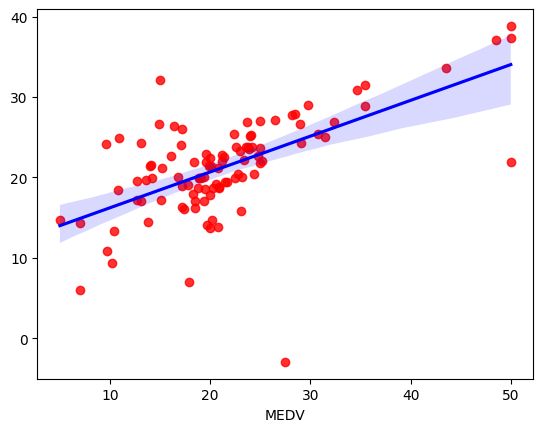

In [18]:
# We want to plot the regression line(blue) vs the actual value(red)
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot( x=y_test, y=y_pred, line_kws={"color":"blue"}, scatter_kws={"color":"red"})
